## Getting data out of the database

In [47]:
import numpy as np
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import scipy
import preprocessing as pp
import wordcloud

%load_ext autoreload
%autoreload 2
%matplotlib inline
# nlp but make it English
nlp = spacy.load("en")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pp.connect_db()
cleaned_df = pp.light_clean(df)

Connected!


/Users/katykoeing/Desktop/advanced-ml/ml-project/advanced-ml-project/preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apply(lambda x: x[0: 1000000])


In [5]:
cleaned_df.head()

,dab_id,alj_id,dab_text,alj_text,dab_url,alj_url,decision_text,decision_binary,dab_year,alj_year
0,DAB 2991,CR5374,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,"DECISION In this consolidated case, we again c...",https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons stated above, we affirm the AL...",1.0,2020,2019.0
1,DAB2990,CR5418,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION The Inspector General of the United S...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons discussed above, we affirm the...",0.0,2020,2019.0
2,DAB2989,CR5483,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION The Inspector General of the United S...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons stated above, we affirm the AL...",0.0,2020,2019.0
3,DAB2988,CR5424,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,"DECISION Petitioner, Edwin L. Fuentes, is excl...",https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons stated above, we affirm the AL...",0.0,2020,2019.0
4,DAB2987,CR5446,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION The Inspector General (IG) of the Dep...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,The Board affirms the ALJ Decision.,0.0,2020,2019.0


## Basic Summary Stats

In [3]:
cleaned_df = pd.read_csv('normalized_plus.csv')
cleaned_df.drop(columns=['Unnamed: 0'], inplace=True)
cleaned_df.head()

,dab_id,alj_id,dab_text,alj_text,dab_url,alj_url,decision_text,decision_binary,dab_year,alj_year,dab_tokenized_text,alj_tokenized_text,normalized_alj_text_POS,normalized_dab_text_POS,dab_normalized_text,alj_normalized_text
0,2989,CR5483,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION The Inspector General of the United S...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons stated above, we affirm the AL...",0.0,2020,2019.0,"['FINAL', 'DECISION', 'ON', 'REVIEW', 'OF', 'A...","['DECISION', 'The', 'Inspector', 'General', 'o...","[('decision', 'NN'), ('the', 'DT'), ('inspecto...","[('final', 'JJ'), ('decision', 'NN'), ('on', '...","['final', 'decision', 'review', 'administrativ...","['decision', 'inspector', 'general', 'united',..."
1,2988,CR5424,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,"DECISION Petitioner, Edwin L. Fuentes, is excl...",https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons stated above, we affirm the AL...",0.0,2020,2019.0,"['FINAL', 'DECISION', 'ON', 'REVIEW', 'OF', 'A...","['DECISION', 'Petitioner', 'Edwin', 'L.', 'Fue...","[('decision', 'NN'), ('petitioner', 'NNP'), ('...","[('final', 'JJ'), ('decision', 'NN'), ('on', '...","['final', 'decision', 'review', 'administrativ...","['decision', 'petitioner', 'edwin', 'l.', 'fue..."
2,2987,CR5446,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION The Inspector General (IG) of the Dep...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,The Board affirms the ALJ Decision.,0.0,2020,2019.0,"['FINAL', 'DECISION', 'ON', 'REVIEW', 'OF', 'A...","['DECISION', 'The', 'Inspector', 'General', 'I...","[('decision', 'NN'), ('the', 'DT'), ('inspecto...","[('final', 'JJ'), ('decision', 'NN'), ('on', '...","['final', 'decision', 'review', 'administrativ...","['decision', 'inspector', 'general', 'ig', 'de..."
3,2986,CR5457,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,"DECISION Petitioner, Richard R. Jimenez, was l...",https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,We affirm the ALJ Decision.,0.0,2020,2019.0,"['FINAL', 'DECISION', 'ON', 'REVIEW', 'OF', 'A...","['DECISION', 'Petitioner', 'Richard', 'R.', 'J...","[('decision', 'NN'), ('petitioner', 'NNP'), ('...","[('final', 'JJ'), ('decision', 'NN'), ('on', '...","['final', 'decision', 'review', 'administrativ...","['decision', 'petitioner', 'richard', 'r.', 'j..."
4,2985,CR5076,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION I grant summary judgment sustaining t...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons discussed above, we affirm the...",0.0,2020,2018.0,"['FINAL', 'DECISION', 'ON', 'REVIEW', 'OF', 'A...","['DECISION', 'I', 'grant', 'summary', 'judgmen...","[('decision', 'NN'), ('i', 'PRP'), ('grant', '...","[('final', 'JJ'), ('decision', 'NN'), ('on', '...","['final', 'decision', 'review', 'administrativ...","['decision', 'grant', 'summary', 'judgment', '..."


In [36]:
def makeProbsArray(dfColumn, overlapDict, if_df=True):
    if if_df:
        words = dfColumn.sum()
    else:
        words = dfColumn
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True
    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct \
            and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))
    return normalized

def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [26]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def jensen_shannon(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.spatial.distance.jensenshannon(p, q)

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except: 
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)
    elif difference == 'JS':
        return jensen_shannon(P, Q)

In [9]:
nlp = spacy.load("en")
nlp.max_length = 20000000

In [12]:
for name, colname in [('dab', 'dab_text'), ('alj', 'alj_text')]:
    print(colname)
    cleaned_df[f'{name}_tokenized_text'] = cleaned_df[colname].apply(lambda x: word_tokenize(x))

dab_text


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


alj_text


In [15]:
import pickle
pickle.dump(cleaned_df, open('tokenized.csv','wb'))

In [16]:
for name, colname in [('dab', 'dab_text'), ('alj', 'alj_text')]:
    print(colname)
    cleaned_df[f'{name}_normalized_text'] = cleaned_df[f'{name}_tokenized_text'].apply(lambda x: normalizeTokens(x))

dab_text


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


alj_text


In [17]:
pickle.dump(cleaned_df, open('normalized.pickle','wb'))

In [18]:
cleaned_df.head()

,dab_id,alj_id,dab_text,alj_text,dab_url,alj_url,decision_text,decision_binary,dab_year,alj_year,dab_tokenized_text,alj_tokenized_text,dab_normalized_text,alj_normalized_text
0,DAB 2991,CR5374,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,"DECISION In this consolidated case, we again c...",https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons stated above, we affirm the AL...",1.0,2020,2019.0,"[FINAL, DECISION, ON, REVIEW, OF, ADMINISTRATI...","[DECISION, In, this, consolidated, case, we, a...","[final, decision, review, administrative, law,...","[decision, consolidated, case, consider, skill..."
1,DAB2990,CR5418,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION The Inspector General of the United S...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons discussed above, we affirm the...",0.0,2020,2019.0,"[FINAL, DECISION, ON, REVIEW, OF, ADMINISTRATI...","[DECISION, The, Inspector, General, of, the, U...","[final, decision, review, administrative, law,...","[decision, inspector, general, united, states,..."
2,DAB2989,CR5483,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION The Inspector General of the United S...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons stated above, we affirm the AL...",0.0,2020,2019.0,"[FINAL, DECISION, ON, REVIEW, OF, ADMINISTRATI...","[DECISION, The, Inspector, General, of, the, U...","[final, decision, review, administrative, law,...","[decision, inspector, general, united, states,..."
3,DAB2988,CR5424,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,"DECISION Petitioner, Edwin L. Fuentes, is excl...",https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,"For the reasons stated above, we affirm the AL...",0.0,2020,2019.0,"[FINAL, DECISION, ON, REVIEW, OF, ADMINISTRATI...","[DECISION, Petitioner, Edwin, L., Fuentes, is,...","[final, decision, review, administrative, law,...","[decision, petitioner, edwin, l., fuentes, exc..."
4,DAB2987,CR5446,FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...,DECISION The Inspector General (IG) of the Dep...,https://www.hhs.gov/about/agencies/dab/decisio...,https://www.hhs.gov/about/agencies/dab/decisio...,The Board affirms the ALJ Decision.,0.0,2020,2019.0,"[FINAL, DECISION, ON, REVIEW, OF, ADMINISTRATI...","[DECISION, The, Inspector, General, IG, of, th...","[final, decision, review, administrative, law,...","[decision, inspector, general, ig, department,..."


In [ ]:
# Quick Zipf's Law Word Count
counted_words = wordCounter(cleaned_df['alj_text'].str.cat(sep=' ').split()).sort_values('count', ascending=False)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(counted_words)), counted_words['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Zipf's Law?")
plt.savefig("zipfs_law.png", dpi=200, figsize=(6, 3))
plt.show()

In [19]:
for col in ('alj_text', 'dab_text'):
    cleaned_df[f'normalized_{col}_POS'] = [spacy_pos(t) for t in cleaned_df[col]]

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
grouped = cleaned_df.groupby('alj_year').agg({'dab_tokenized_text': 'sum',
                                              'alj_tokenized_text': 'sum'}).reset_index()

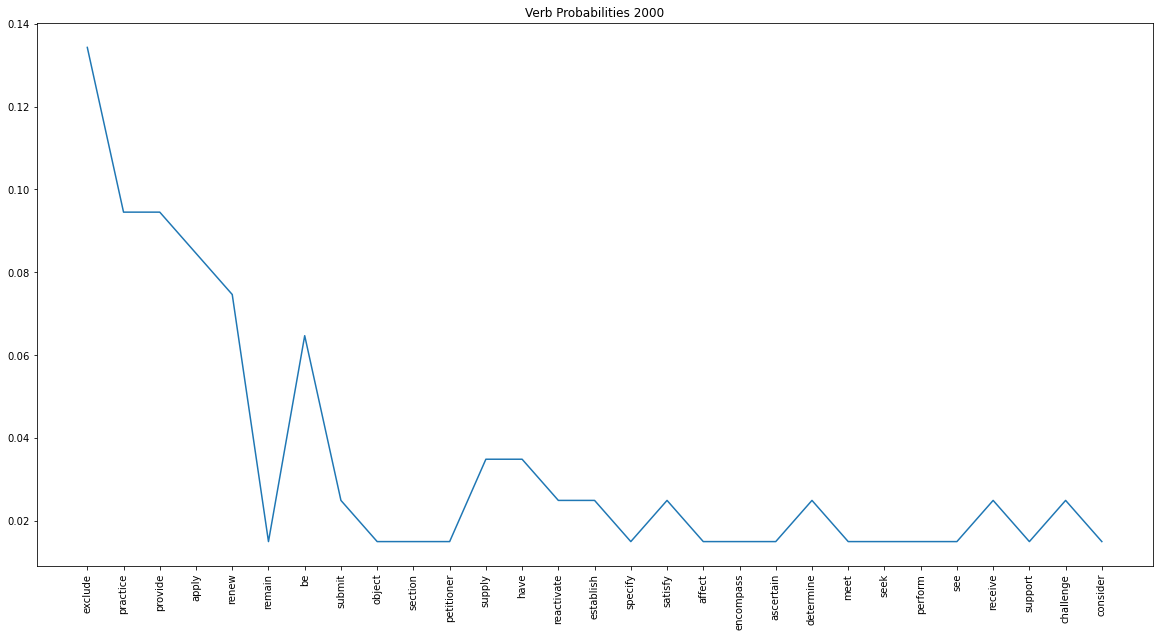

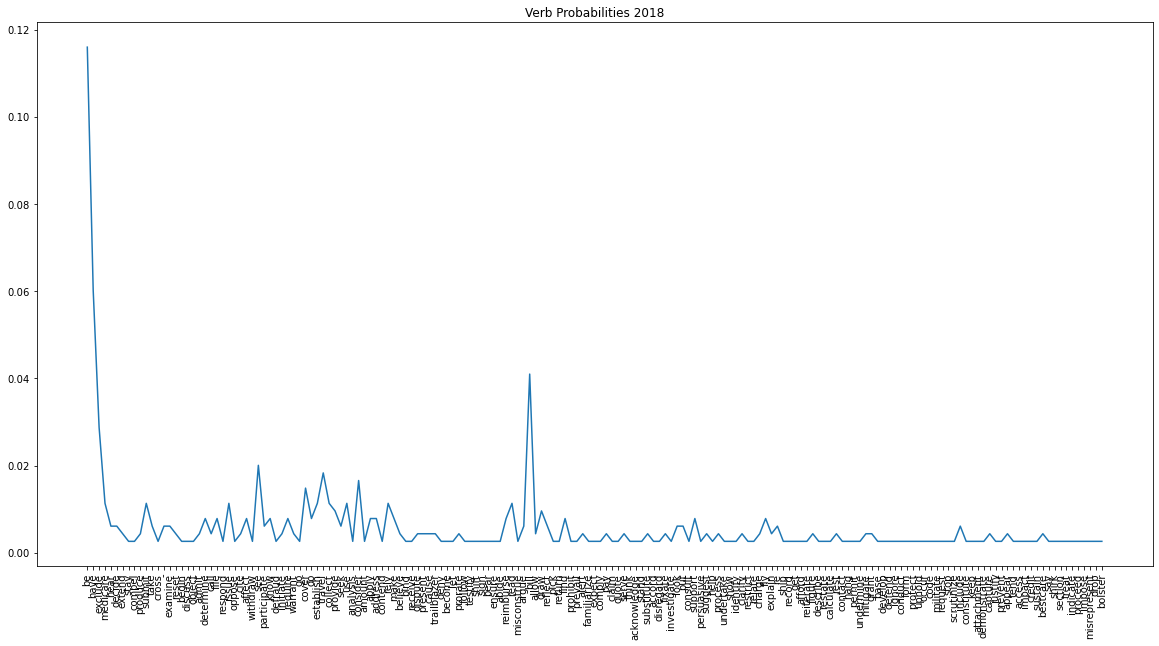

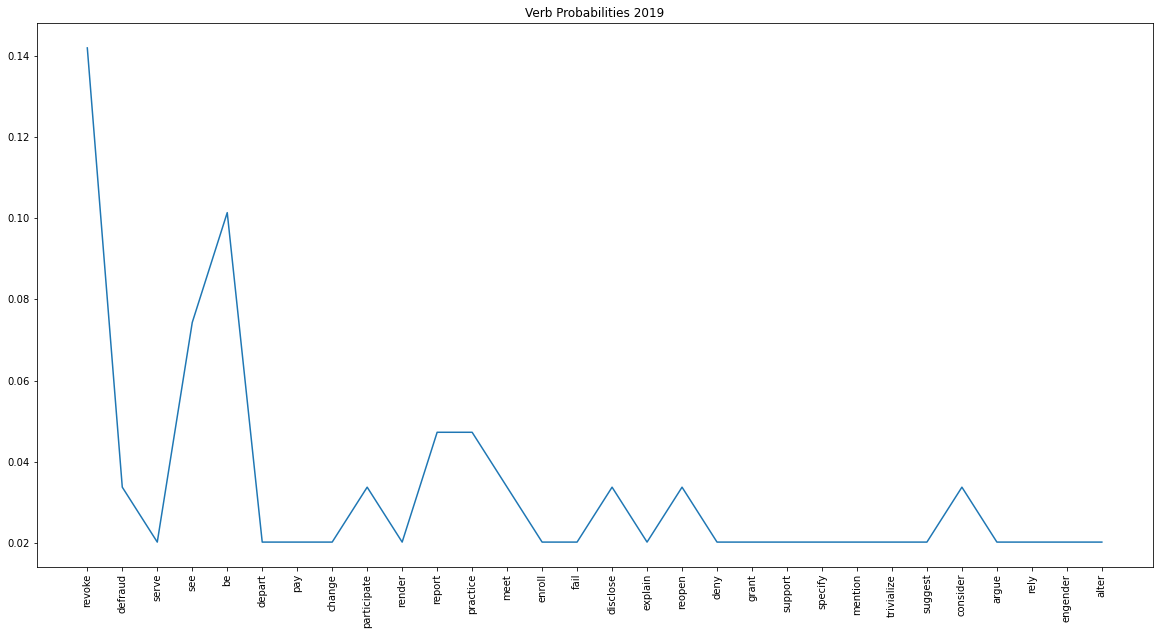

In [21]:
# verb probabilities for alj
# I think we can reorder these by prob and cut to only show relevant
for year in (2000, 2018, 2019):
    one_yr = cleaned_df[cleaned_df['dab_year'] == year]
    dist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p \
                                              in one_yr['normalized_alj_text_POS']. \
                                              iloc[0])
    fig, ax = plt.subplots(figsize=(20, 10))
    one_yr_pdist = nltk.ConditionalProbDist(dist_POStoWord, nltk.ELEProbDist)
    words = []
    probs = []
    for sample in one_yr_pdist['VB'].samples():
        words.append(sample)
        probs.append(one_yr_pdist['VB'].prob(sample))
        plt.title(f'Verb Probabilities {year}')
    plt.xticks(rotation=90)
    plt.plot(words, probs)
    plt.show()

In [7]:
nlp.max_length = 20000000

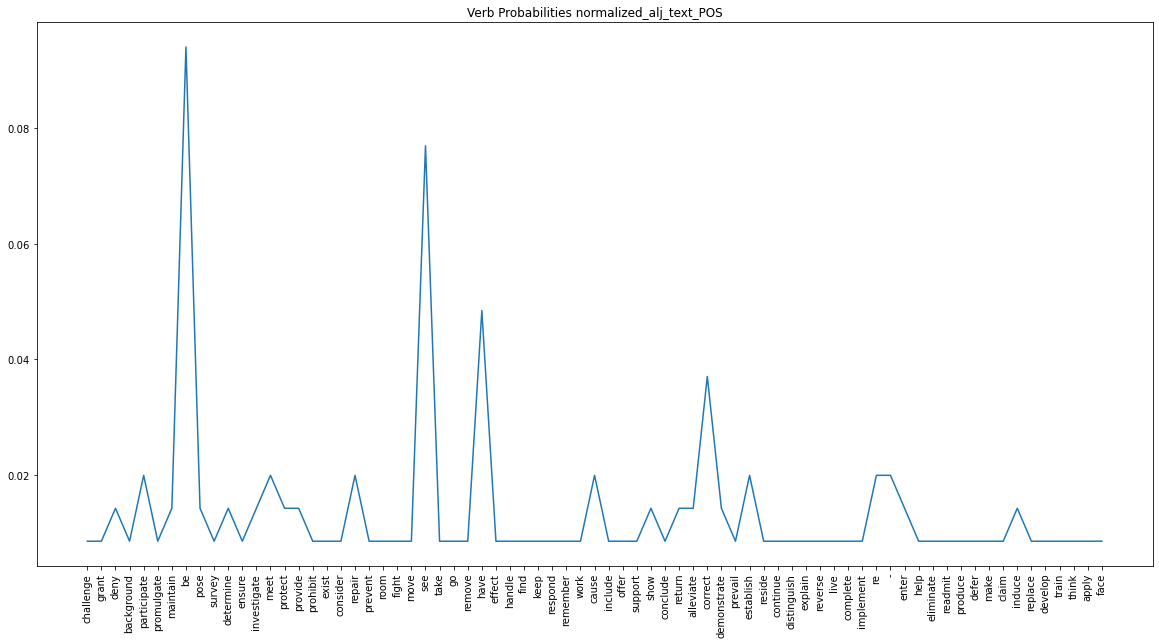

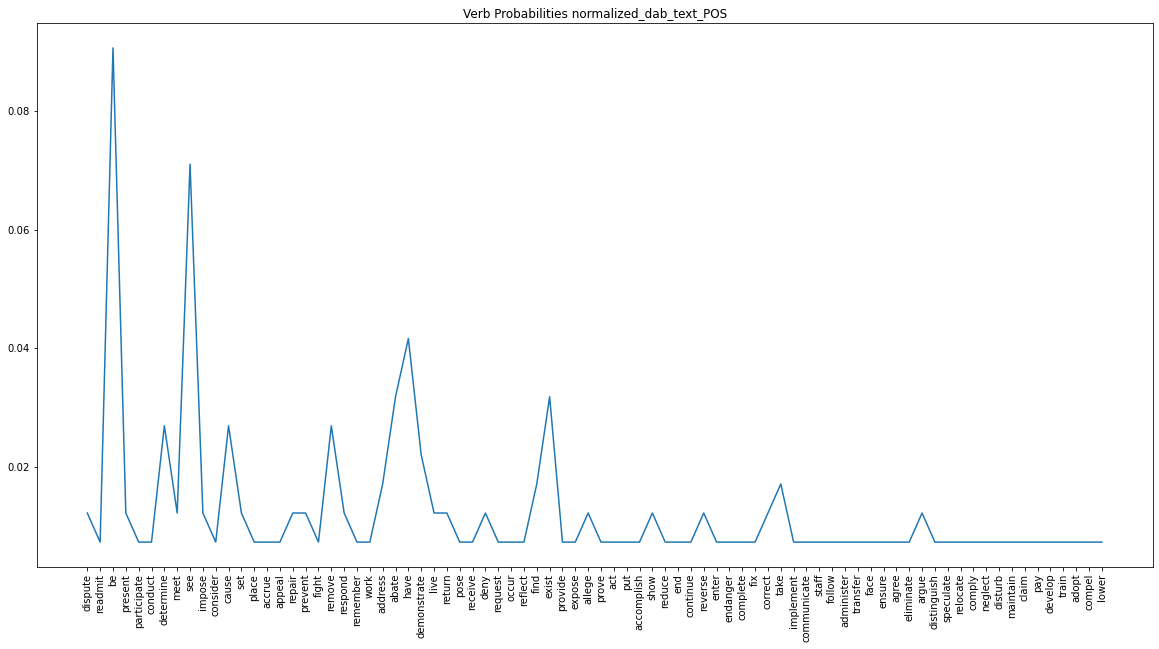

In [23]:
for col in ('normalized_alj_text_POS', 'normalized_dab_text_POS'):
    dist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p \
                                              in cleaned_df[col]. \
                                              iloc[0])
    fig, ax = plt.subplots(figsize=(20, 10))
    one_yr_pdist = nltk.ConditionalProbDist(dist_POStoWord, nltk.ELEProbDist)
    words = []
    probs = []
    for sample in one_yr_pdist['VB'].samples():
        words.append(sample)
        probs.append(one_yr_pdist['VB'].prob(sample))
        plt.title(f'Verb Probabilities {col}')
    plt.xticks(rotation=90)
    plt.plot(words, probs)
    plt.show()

In [24]:
# Divergence Measure Heatmaps for Years for DAB Text
corpora_yrs = []
for index, row in grouped.iterrows():
    corpora_yrs.append(row['alj_tokenized_text'])

# separating stop and nonstop words
corpora_s_yrs = []
corpora_nons_yrs = []
for corpus in corpora_yrs:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s_yrs.append(s)
    corpora_nons_yrs.append(nons)

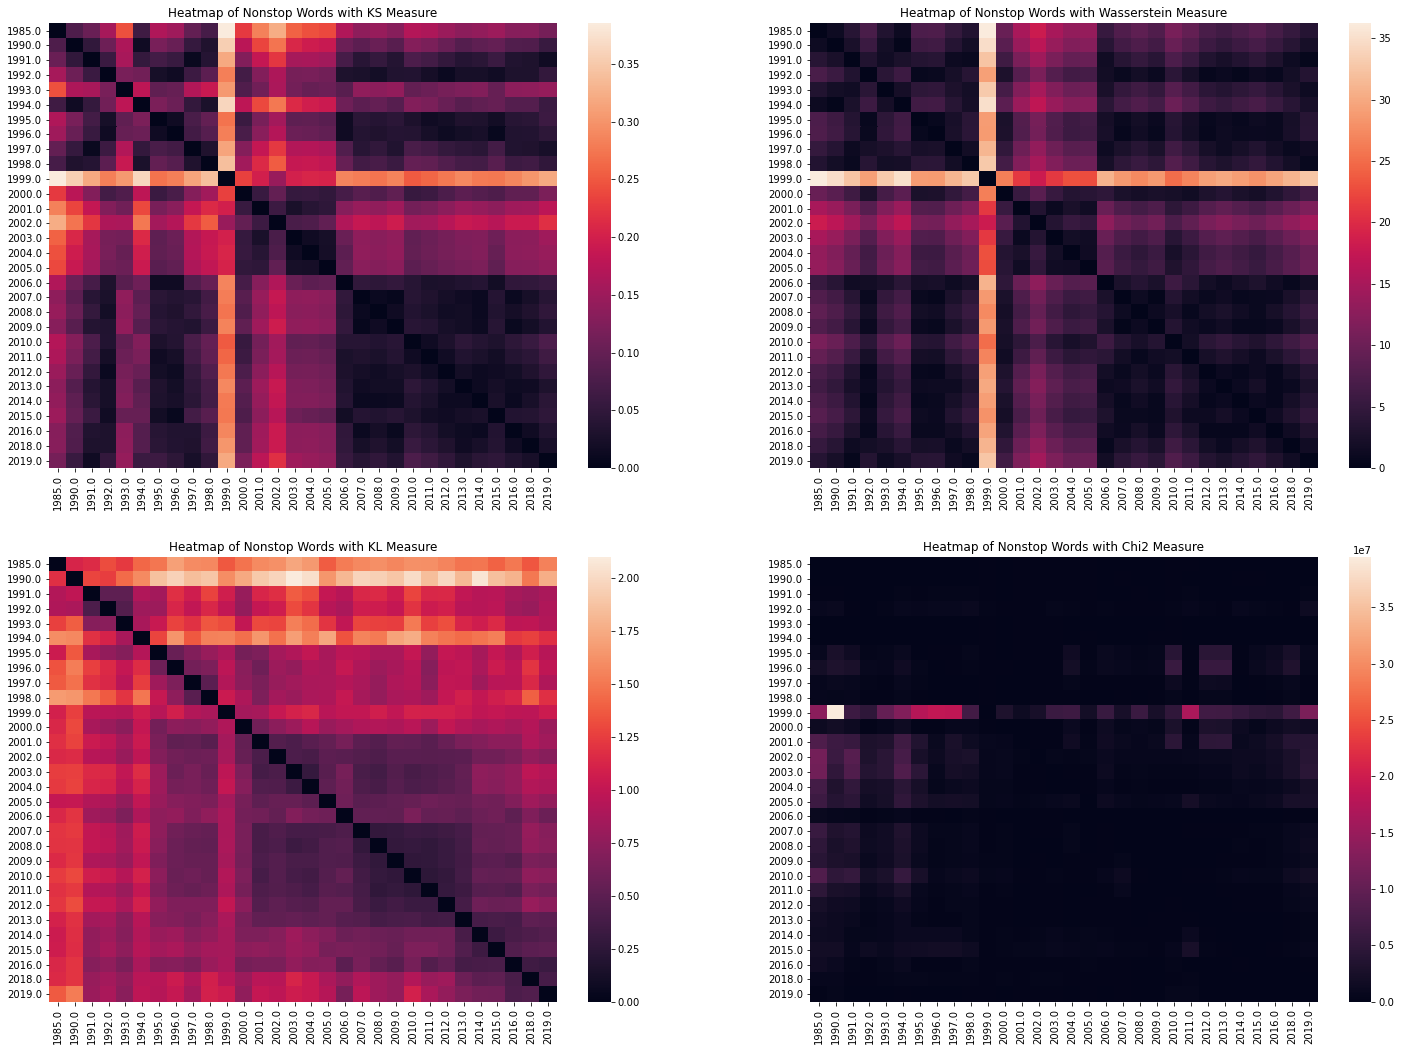

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
fileids = list(grouped['alj_year'])
measure_lst = ['KS', "Wasserstein", "KL", "Chi2"]
f, axes = plt.subplots(2, 2, figsize=(25, 18))
for measure, ax in zip(measure_lst, axes.flatten()[:4]):
    ax.set_title(f'Heatmap of Nonstop Words with {measure} Measure')
    L = []
    for p in corpora_nons_yrs:
        l = []
        for q in corpora_nons_yrs:
            l.append(Divergence(p, q, difference=measure))
        L.append(l)
    M = np.array(L)
    fig = plt.figure()
    div = pd.DataFrame(M, columns=fileids, index=fileids)
    g = sns.heatmap(div, ax=ax)
    plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

In [29]:
grouped_outcome = cleaned_df.groupby('decision_binary'). \
                             agg({'dab_normalized_text': 'sum',
                                  'alj_normalized_text': 'sum',
                                  'alj_id': 'count', 
                                   'dab_tokenized_text': 'sum',
                                  'alj_tokenized_text': 'sum',}).reset_index()

In [7]:
grouped_outcome.head()

,decision_binary,dab_normalized_text,alj_normalized_text,alj_id,dab_tokenized_text,alj_tokenized_text
0,0.0,"['final', 'decision', 'review', 'administrativ...","['decision', 'inspector', 'general', 'united',...",458,"['FINAL', 'DECISION', 'ON', 'REVIEW', 'OF', 'A...","['DECISION', 'The', 'Inspector', 'General', 'o..."
1,1.0,"['department', 'health', 'human', 'service', '...","['decision', 'center', 'medicare', 'medicaid',...",85,"['Department', 'of', 'Health', 'and', 'Human',...","['DECISION', 'The', 'Centers', 'for', 'Medicar..."


Wasserstein
Euclidian metric structure (e.g., numbers of words), this is also known as the earth mover’s distance, can be seen as the minimum amount of "work" required to transform P into Q
"work" is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved.


KL divergence computes the relative entropy between two distributions--how they differ in bits

In [34]:
def find_div(df1_col, df2_col, measure, if_df=True):
    if if_df:
        wordset1 = set(df1_col.iloc[0])
        wordset2 = set(df2_col.iloc[0])
    else:
        wordset1 = set(df1_col)
        wordset2 = set(df2_col)
    #Change & to | if you want to keep all words
    overlapWords = wordset1 & wordset2
    overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
    word1ProbArray = makeProbsArray(df1_col, overlapWordsDict, if_df)
    word2ProbArray = makeProbsArray(df2_col, overlapWordsDict, if_df)
    if measure == 'KL':
        word1_word2_divergence = scipy.stats.entropy(word1ProbArray, word2ProbArray)
        word2_word1_divergence = scipy.stats.entropy(word2ProbArray, word1ProbArray)
        print(word1_word2_divergence)
        print(word2_word1_divergence)
    if measure == 'Was':
        div = scipy.stats.wasserstein_distance(word1ProbArray, word2ProbArray)
        print(div)

In [37]:
# is the base text (alj) that different for ones which are approved or not approved?
denied = grouped_outcome[grouped_outcome['decision_binary'] == 0]
approved = grouped_outcome[grouped_outcome['decision_binary'] == 1]

for meas in ['KL', 'Was']:
    print(meas)
    find_div(denied['alj_normalized_text'], approved['alj_normalized_text'], meas, True)

KL
0.1114523555916744
0.14541595507052027
Was
3.968686909393151e-06


In [39]:
# is appeal text that different for approved vs not approved?
denied = grouped_outcome[grouped_outcome['decision_binary'] == 0]
approved = grouped_outcome[grouped_outcome['decision_binary'] == 1]
for meas in ['KL', 'Was']:
    print(meas)
    find_div(denied['dab_normalized_text'], approved['dab_normalized_text'], meas)

KL
0.2754619913896113
0.29012277921376006
Was
1.051880458085491e-05


So there isn't much of a difference overall in either alj or dab texts for decisions that are or are not repealed. Below let's check this out on an individual-level with some randomly chosen cases.

In [41]:
rand_samples = cleaned_df.sample(10)
rand_samples

,dab_id,alj_id,dab_text,alj_text,dab_url,alj_url,decision_text,decision_binary,dab_year,alj_year,dab_tokenized_text,alj_tokenized_text,dab_normalized_text,alj_normalized_text,normalized_alj_text_POS,normalized_dab_text_POS
1244,DAB1824,CR821,"SUBJECT: Beechwood Sanitarium, Peti...","SUBJECT: Beechwood Sanitarium,Petitioner, Cent...",https://www.hhs.gov/sites/default/files/static...,https://www.hhs.gov/sites/default/files/static...,"SUBJECT: Beechwood Sanitarium, Peti...",1.0,2002,2001.0,"[SUBJECT, Beechwood, Sanitarium, Petitioner, C...","[SUBJECT, Beechwood, Sanitarium, Petitioner, C...","[subject, beechwood, sanitarium, petitioner, c...","[subject, beechwood, sanitarium, petitioner, c...","[(subject, JJ), (:, :), (beechwood, NNP), (san...","[( , _SP), (subject, NN), (:, :), ( , ..."
832,DAB2221,CR1783,Department of Health and Human Services DEPAR...,Department of Health and Human Services DEPART...,https://www.hhs.gov/sites/default/files/static...,https://www.hhs.gov/sites/default/files/static...,s of Law 3-6 Shady Grove contends (and the AL...,0.0,2008,2008.0,"[Department, of, Health, and, Human, Services,...","[Department, of, Health, and, Human, Services,...","[department, health, human, service, departmen...","[department, health, human, service, departmen...","[(department, NNP), (of, IN), (health, NNP), (...","[(department, NNP), (of, IN), (health, NNP), (..."
17,DAB2975,CR5074,Department of Health and Human Services DEPART...,"DECISION Palmetto GBA (“Palmetto”), a Medicare...",https://www.hhs.gov/sites/default/files/board-...,https://www.hhs.gov/about/agencies/dab/decisio...,The Board affirms the ALJ Decision.,0.0,2019,2018.0,"[Department, of, Health, and, Human, Services,...","[DECISION, Palmetto, GBA, Palmetto, a, Medicar...","[department, health, human, service, departmen...","[decision, palmetto, gba, palmetto, medicare, ...","[(decision, NN), (palmetto, NNP), (gba, NNP), ...","[(department, NNP), (of, IN), (health, NNP), (..."
592,DAB 2443,CR2420,Department of Health and Human Services DEPART...,Department of Health and Human Services DEPART...,https://www.hhs.gov/sites/default/files/static...,https://www.hhs.gov/sites/default/files/static...,"For the reasons stated above, we affirm the A...",0.0,2012,2011.0,"[Department, of, Health, and, Human, Services,...","[Department, of, Health, and, Human, Services,...","[department, health, human, service, departmen...","[department, health, human, service, departmen...","[(department, NNP), (of, IN), (health, NNP), (...","[(department, NNP), (of, IN), (health, NNP), (..."
1049,DAB2015,CR1300,SUBJECT: Thomas M. Horras and Chris...,"SUBJECT: The Inspector General, Pet...",https://www.hhs.gov/sites/default/files/static...,https://www.hhs.gov/sites/default/files/static...,"For the reasons explained above, we a...",0.0,2006,2005.0,"[SUBJECT, Thomas, M., Horras, and, Christine, ...","[SUBJECT, The, Inspector, General, Petitioner,...","[subject, thomas, m., horras, christine, richa...","[subject, inspector, general, petitioner, thom...","[( , _SP), (subject, NN), (:, :), ( , _SP), (t...","[( , _SP), (subject, NN), (:, :), ( , _SP), (t..."
734,DAB2314,CR2012,Department of Health and Human Services DEPAR...,Department 9f Health and Human Services DEPAR...,https://www.hhs.gov/sites/default/files/static...,https://www.hhs.gov/sites/default/files/static...,"For the reasons stated above, we affirm witho...",1.0,2010,2009.0,"[Department, of, Health, and, Human, Services,...","[Department, 9f, Health, and, Human, Services,...","[department, health, human, service, departmen...","[department, 9f, health, human, service, depar...","[(department, NNP), (9f, NNP), (health, NNP), ...","[(department, NNP), (of, IN), (health, NNP), (..."
640,DAB2400,CR2345,Department of Health and Human Services DEPART...,Department of Health and Human Services DEPART...,https://www.hhs.gov/sites/default/files/static...,https://www.hhs.gov/sites/default/files/static...,"For the reasons discussed above, we aff

In [42]:
for i, row in rand_samples.iterrows():
    for meas in ['KL', 'Was']:
        print(meas)
        find_div(row['alj_normalized_text'] , row['dab_normalized_text'], meas, False)

KL
0.938554338741869
0.9322115652154035
Was
0.0004578138902433618
KL
0.2951716736161729
0.30191518248244675
Was
0.0005767977578892752
KL
0.21316723124390707
0.25477432030794167
Was
0.00038538845457246514
KL
0.35812592014400685
0.4660566996821094
Was
0.00023317979452755358
KL
0.35474610617385743
0.4309120959500571
Was
8.815061156026047e-05
KL
0.6575663895661441
0.7604596069654933
Was
0.0002231686205182029
KL
0.3193680165672528
0.38508195320253324
Was
0.0010334597462026197
KL
0.5616525277122248
0.5795528384845884
Was
0.00026527337909538985
KL
0.45309543521955326
0.4842867555263899
Was
0.0006634928121016994
KL
0.766885776055749
0.5926846904321614
Was
0.009313803067869428


In [44]:
# let's look at the difference between alj and dab text overall?
all_dabs = ' '.join(cleaned_df['dab_normalized_text'].sum())
all_aljs = ' '.join(cleaned_df['alj_normalized_text'].sum())

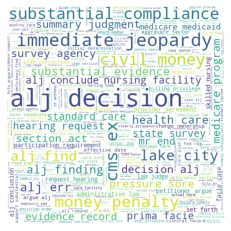

In [48]:
fig = plt.figure()
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000,
                         height = 1000, mode ='RGBA', scale=.5). \
                         generate(all_dabs)
plt.imshow(wc)
plt.axis("off")
my_dpi=96
plt.savefig("dab_word_cloud.png", figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

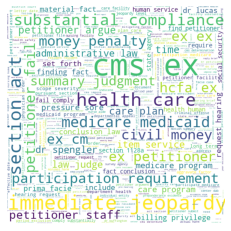

In [49]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000,
                         height = 1000, mode ='RGBA', scale=.5). \
                         generate(all_aljs)
plt.imshow(wc)
plt.axis("off")
my_dpi=96
plt.savefig("alj_word_cloud.png", figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

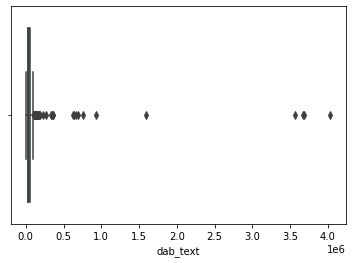

In [54]:
sns.boxplot(cleaned_df['dab_text'].str.len())

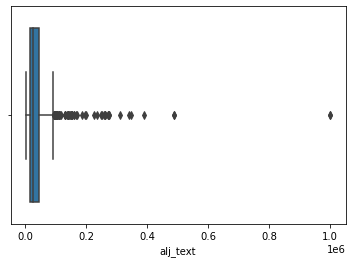

In [56]:
sns.boxplot(cleaned_df['alj_text'].str.len())